In [1]:
print("python")

python


In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
sns.set()

In [3]:
df = pd.read_csv(r"kidney_disease.csv")
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
df.shape

(400, 26)

In [5]:
#duplication  possibility
df.duplicated().sum()

0

In [6]:
df.isnull().sum()/len(df)*100

id                 0.00
age                2.25
bp                 3.00
sg                11.75
al                11.50
su                12.25
rbc               38.00
pc                16.25
pcc                1.00
ba                 1.00
bgr               11.00
bu                 4.75
sc                 4.25
sod               21.75
pot               22.00
hemo              13.00
pcv               17.50
wc                26.25
rc                32.50
htn                0.50
dm                 0.50
cad                0.50
appet              0.25
pe                 0.25
ane                0.25
classification     0.00
dtype: float64

generally dropping high null values .but should be done with domain knowleedgd


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [8]:
for i in df.columns:
  print("**************************",i,"**************************")
  print()
  print(set(df[i].tolist()))


************************** id **************************

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 2

From above we observe some columns data type is not correct and in some columns the values of the columns are same but given differnt notion they should be changed(cad,dm,classification)

In [9]:
df["classification"]=df["classification"].apply(lambda x:"ckd"if x=="ckd\t" else x)
df["classification"]=df["classification"].apply(lambda x:"not ckd"if x=="notckd" else x)

In [10]:
df["dm"]=df["dm"].apply(lambda x: "no" if x=="\tno" else x)
df["dm"]=df["dm"].apply(lambda x: "yes" if x=="\tyes" else x)
df["dm"]=df["dm"].apply(lambda x: "yes" if x==" yes" else x)
df["cad"]=df["cad"].apply(lambda x: "no" if x=="\tno" else x)


now we have o change object type columns to numeric but make sure that evey value is numerical


In [11]:
df["rc"].mode()#we go with mode to fill the object space. beacue we cannot manipulate an object with mean or median

0    5.2
Name: rc, dtype: object

In [12]:
df["rc"]=df["rc"].apply(lambda x: "5.2" if x=="\t?" else x)


In [13]:
df["wc"]= df["wc"].apply(lambda x: "6200" if x=="\t6200" else x)
df["wc"]= df["wc"].apply(lambda x: "8400" if x=="\t8400" else x)
df["wc"]= df["wc"].apply(lambda x: "9800" if x=="\t?" else x)

In [14]:
df["wc"].mode()

0    9800
Name: wc, dtype: object

In [15]:
print(set(df["wc"].tolist()))

{'10800', '10200', '12200', '10900', '10700', '5400', '10300', '9200', '8500', '5500', '9800', '14900', '2200', '5600', '5200', '7400', '6000', '15200', '12100', '11300', '9100', '11800', '6900', '14600', '7300', '7000', '10500', '4300', '11900', nan, '7200', '12700', '16700', '9400', '8300', '4100', '18900', '9600', '8000', '7100', '15700', '13200', '9700', '5000', '6600', '11500', '26400', '6200', '6800', '2600', '5800', '7700', '12400', '8600', '12300', '12800', '8800', '9300', '19100', '8100', '4500', '12500', '7800', '5300', '6300', '5100', '4200', '9900', '21600', '6700', '6400', '6500', '10400', '8400', '4700', '12000', '7900', '7500', '9000', '11000', '5700', '11200', '4900', '8200', '16300', '5900', '9500', '11400', '3800', '13600'}


In [16]:
df["wc"]= df["wc"].apply(lambda x: "9800" if x=="\t" else x)

In [17]:
print(set(df["pcv"].tolist()))

{'9', '29', '44', '27', '36', '20', nan, '38', '31', '\t?', '15', '45', '18', '21', '46', '50', '\t43', '23', '43', '48', '42', '40', '30', '25', '24', '52', '49', '22', '16', '54', '47', '51', '41', '32', '53', '35', '39', '19', '26', '33', '28', '14', '34', '37', '17'}


In [18]:
df["pcv"]=df["pcv"].apply(lambda x: "43" if x=="\t43" else x)

df["pcv"]=df["pcv"].apply(lambda x: "41" if x=="\t?" else x)#we have two modes we are taking one


now object types to numerical pcv,rc,wc

In [19]:
df["pcv"]=df["pcv"].fillna(df["pcv"].mode()[0])
df["wc"]=df["wc"].fillna(df["wc"].mode()[0])
df["rc"]=df["rc"].fillna(df["rc"].mode()[0])


In [20]:
df["pcv"]=df["pcv"].astype(np.int64)
df["wc"]=df["wc"].astype(np.int64)
df["rc"]=df["rc"].astype(np.float64)


In [21]:
#lets know what are the datatypes of columns

object_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(include=['float64','int64']).columns
print("object_colums")
print(object_columns)
print("numerical_columns")
print(numerical_columns)

object_colums
Index(['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane',
       'classification'],
      dtype='object')
numerical_columns
Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot',
       'hemo', 'pcv', 'wc', 'rc'],
      dtype='object')


In [22]:
from sklearn.impute import SimpleImputer
imp_model1 = SimpleImputer(missing_values=np.nan,strategy="most_frequent")
imp_model2 = SimpleImputer(missing_values=np.nan,strategy="median")
df_impl = pd.DataFrame(imp_model1.fit_transform(df[object_columns]))
df_impl.columns = df[object_columns].columns


In [23]:
df_imp2 = pd.DataFrame(imp_model2.fit_transform(df[numerical_columns]))
df_imp2.columns = df[numerical_columns].columns


In [24]:
print(df_impl.isnull().sum().sum())

df_imp2.isnull().sum().sum()

0


0

In [25]:
df_imp2=df_imp2.drop(["id"],axis=1)


outlier analysis

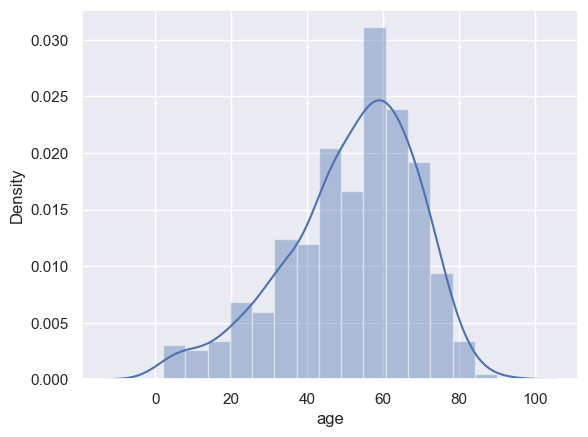

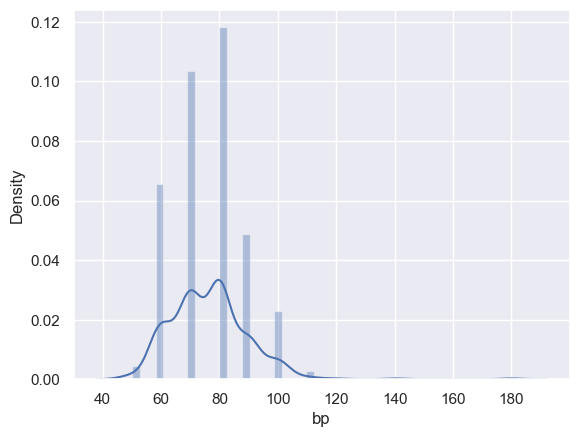

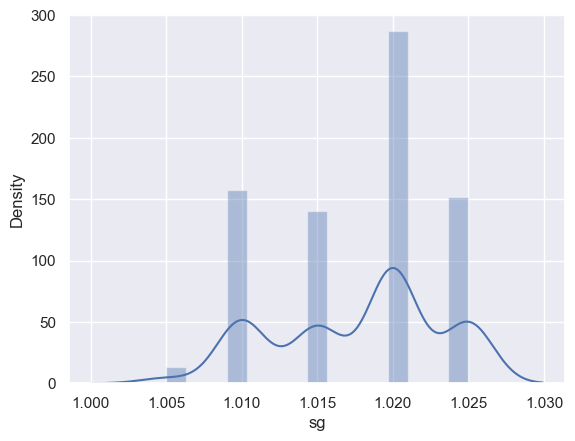

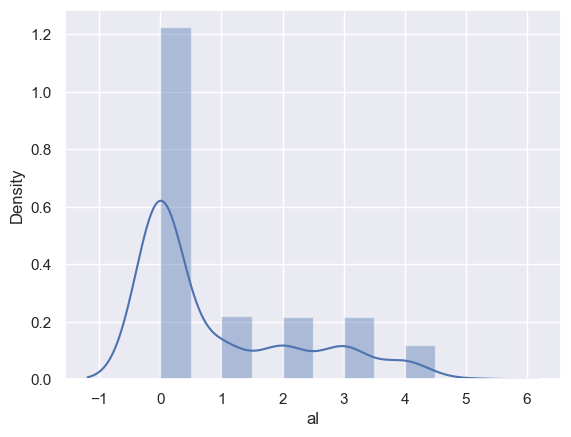

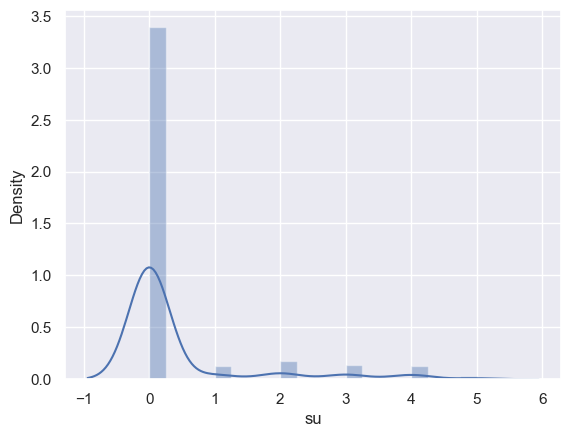

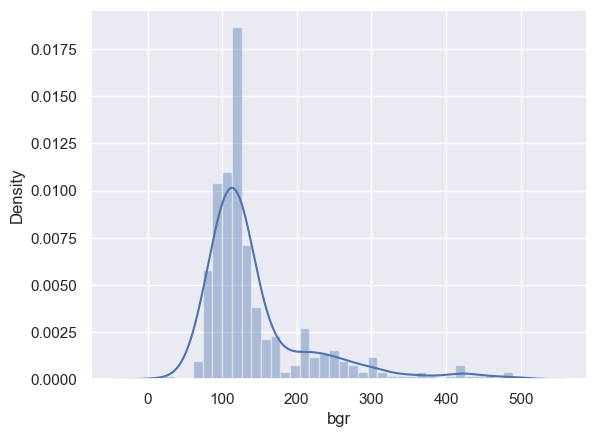

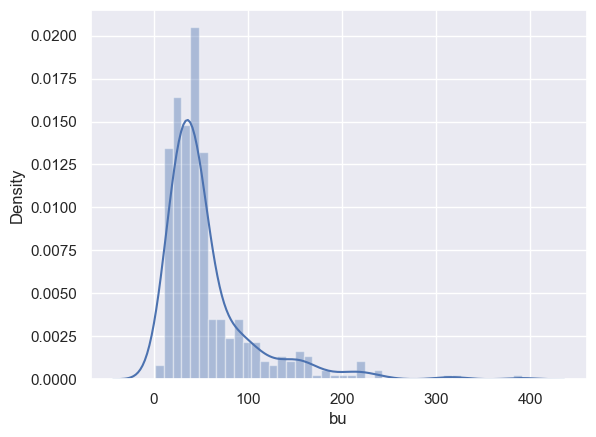

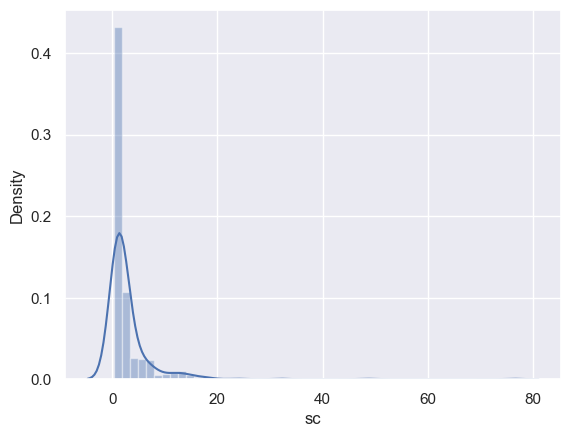

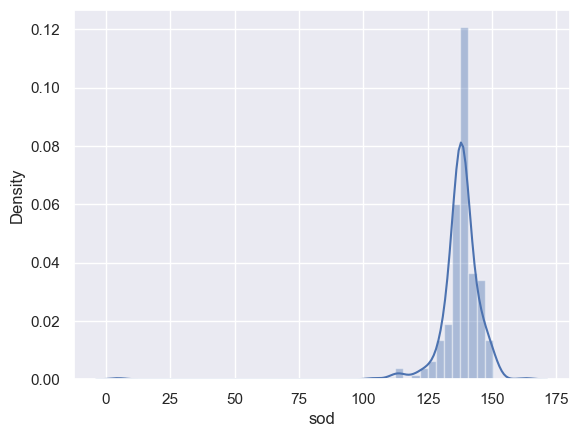

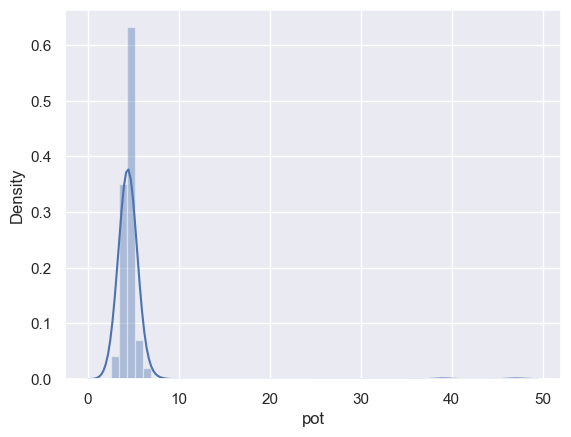

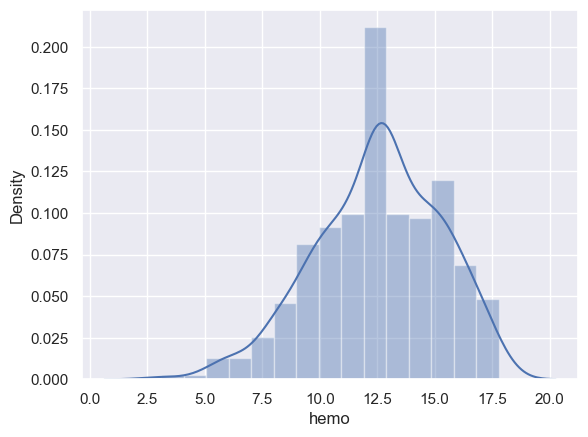

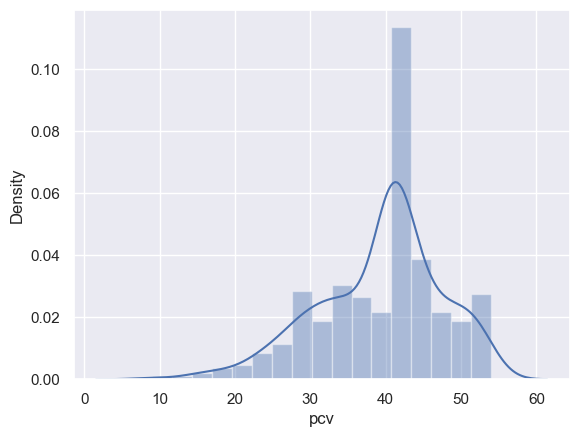

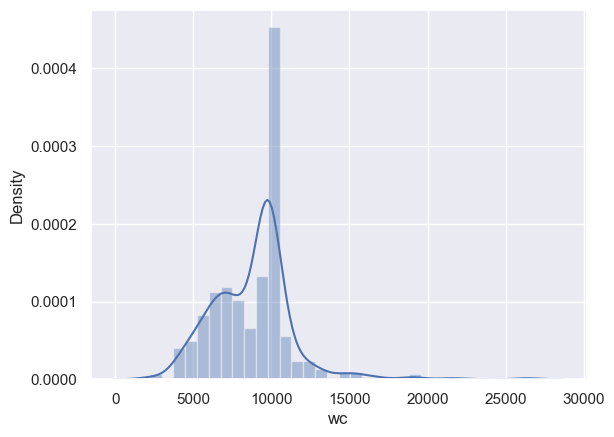

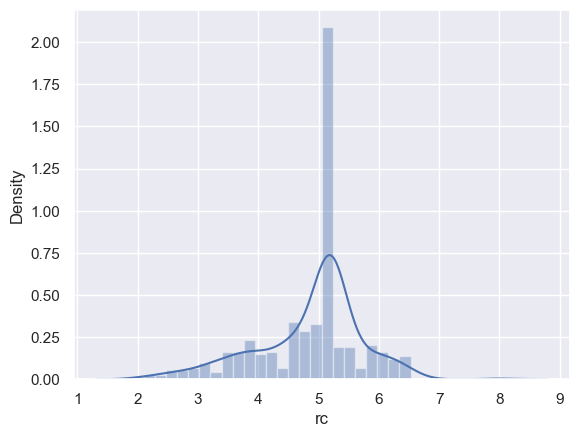

In [26]:
def distplots(col):
  sns.distplot(df_imp2[col])
  plt.show()
for i in df_imp2.columns:
  distplots(i)

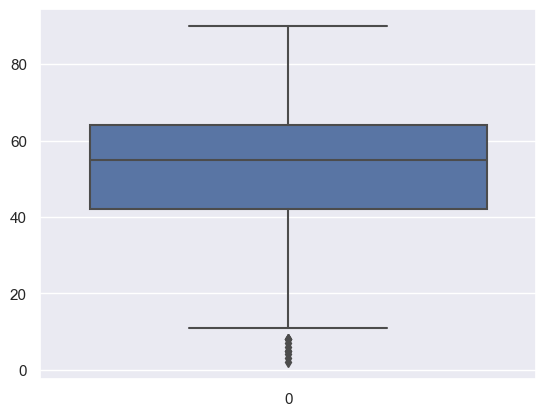

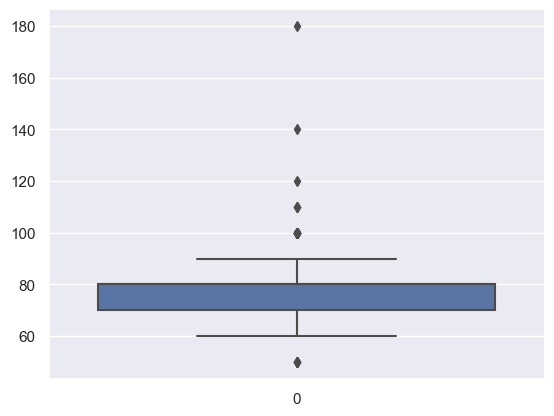

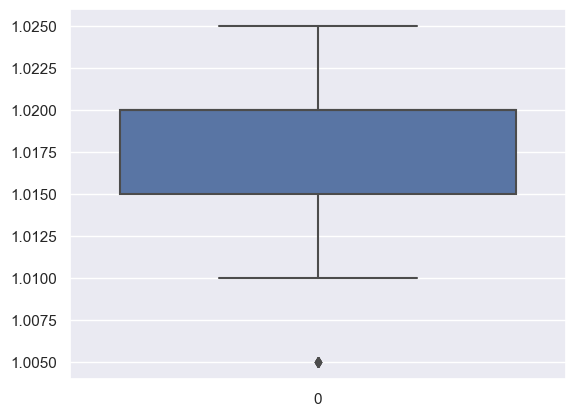

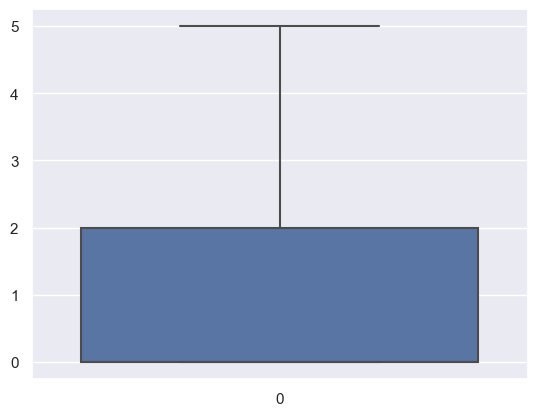

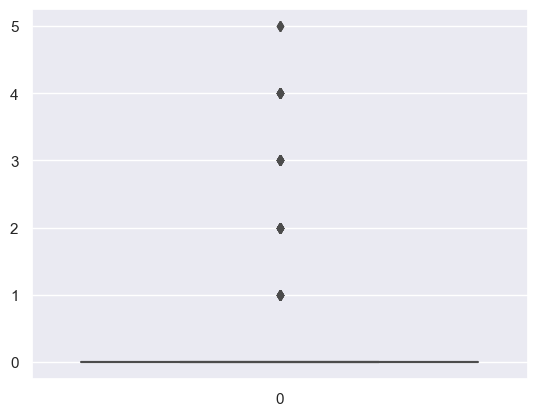

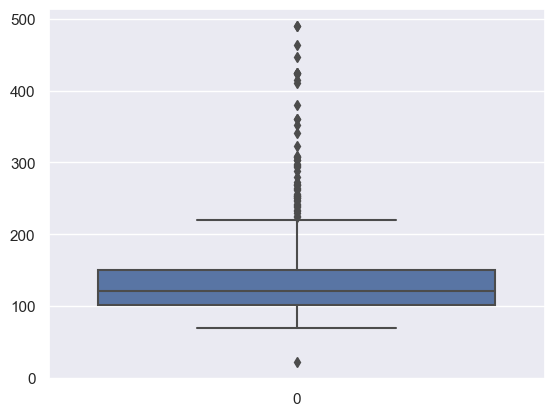

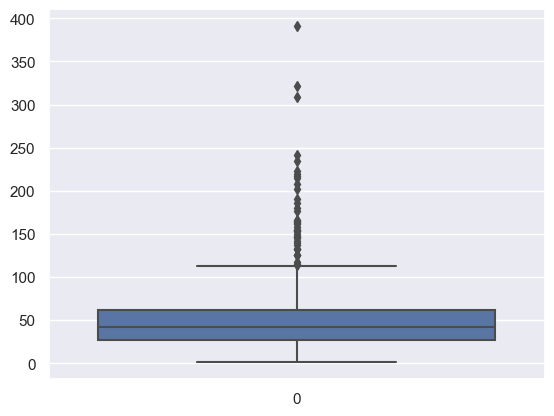

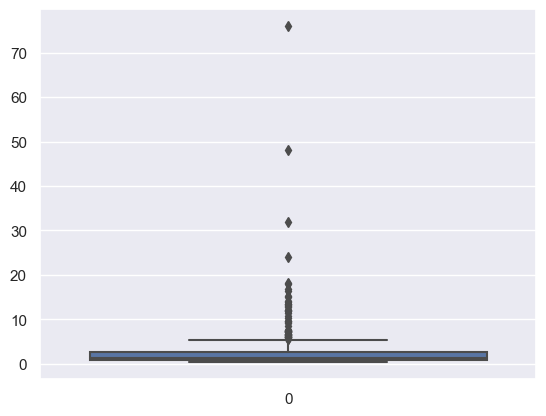

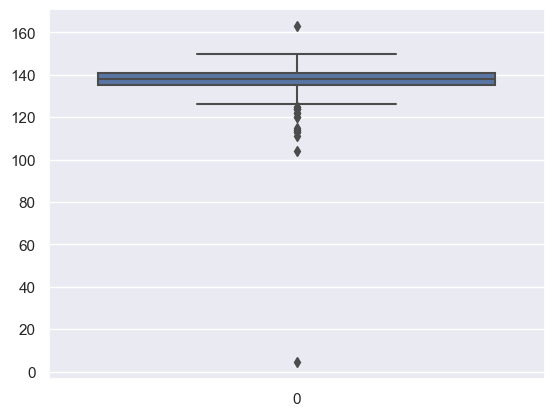

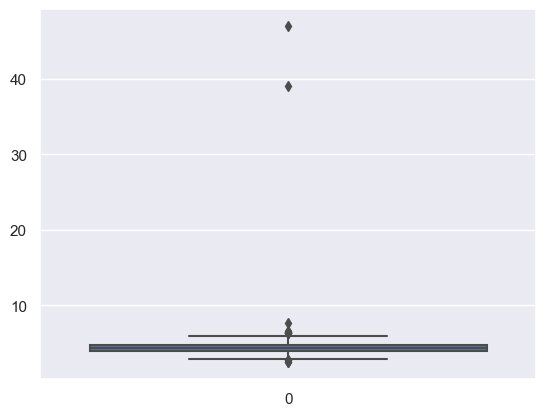

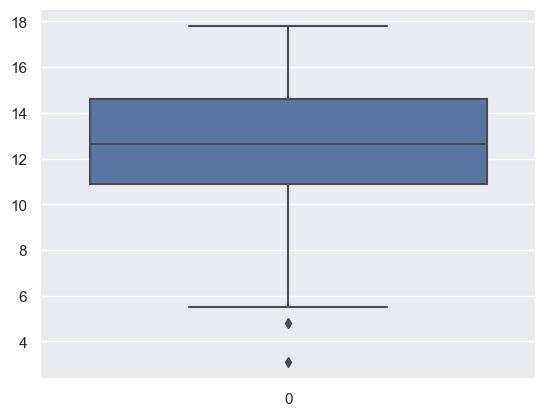

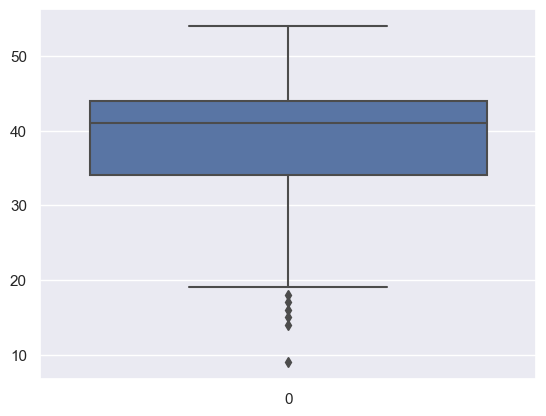

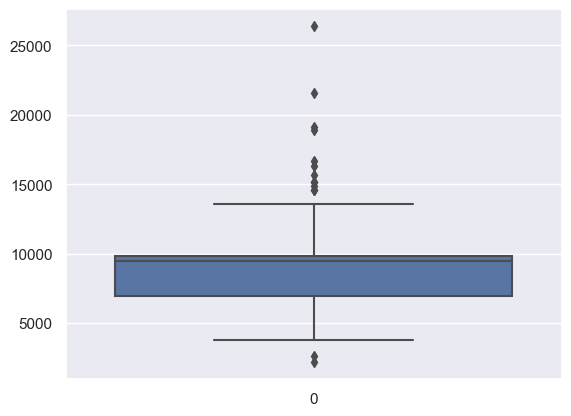

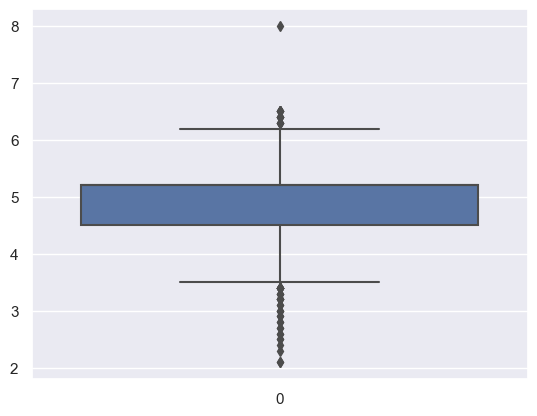

In [27]:
def boxplots(col):
  sns.boxplot(df_imp2[col])
  plt.show()
for i in df_imp2.columns:
  boxplots(i)

In [28]:
table_df = pd.concat([df_impl,df_imp2],axis=1)

In [29]:
table_df.isnull().sum().sum()

0

In [30]:
x = table_df.drop(["classification"],axis=1)
Y = table_df["classification"]

In [31]:
Y

0          ckd
1          ckd
2          ckd
3          ckd
4          ckd
        ...   
395    not ckd
396    not ckd
397    not ckd
398    not ckd
399    not ckd
Name: classification, Length: 400, dtype: object

In [32]:
set(df["classification"].tolist())

{'ckd', 'not ckd'}

  Encoding categorical columns

In [33]:
Y  = np.where(Y=="ckd",1,0)

In [34]:
#handling encoding concept
def classify_features(x):
  categorical_features=[]
  non_categorical_features=[]
  discrete_features=[]
  continous_features=[]
  for column in x.columns:
    if x[column].dtype == "object":
      if x[column].nunique() < 3:
        categorical_features.append(column)
      else:
        non_categorical_features.append(column)
    elif x[column].dtype == "int64" or x[column].dtype == "float64":
      if x[column].nunique() < 10:
        discrete_features.append(column)
      else:
        continous_features.append(column)
  return categorical_features,non_categorical_features,discrete_features,continous_features

In [35]:
categorical,non_categorical,discrete,continous=classify_features(table_df)

In [36]:
categorical

['rbc',
 'pc',
 'pcc',
 'ba',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'classification']

In [37]:
non_categorical

[]

In [38]:
discrete

['sg', 'al', 'su']

In [39]:
continous

['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']

label encoding for ordinal data(where values have a order).one hot for nominal variables (categorical)


**EDA**

LETS EXPLORE UNIQUE VALUES FOR BETTTER ENCODING

In [40]:
for i in categorical:
  print(table_df[i].value_counts())
  print()

normal      353
abnormal     47
Name: rbc, dtype: int64

normal      324
abnormal     76
Name: pc, dtype: int64

notpresent    358
present        42
Name: pcc, dtype: int64

notpresent    378
present        22
Name: ba, dtype: int64

no     253
yes    147
Name: htn, dtype: int64

no     263
yes    137
Name: dm, dtype: int64

no     366
yes     34
Name: cad, dtype: int64

good    318
poor     82
Name: appet, dtype: int64

no     324
yes     76
Name: pe, dtype: int64

no     340
yes     60
Name: ane, dtype: int64

ckd        250
not ckd    150
Name: classification, dtype: int64



from above we see only 2 labels for all categories so we can go by label or one  hot encoding technique

In [41]:
df_dummies = pd.get_dummies(table_df[categorical],drop_first=True)

In [42]:
table_df[categorical]

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification
0,normal,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...
395,normal,normal,notpresent,notpresent,no,no,no,good,no,no,not ckd
396,normal,normal,notpresent,notpresent,no,no,no,good,no,no,not ckd
397,normal,normal,notpresent,notpresent,no,no,no,good,no,no,not ckd
398,normal,normal,notpresent,notpresent,no,no,no,good,no,no,not ckd


In [43]:
df_dummies

,rbc_normal,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes,classification_not ckd
0,1,1,0,0,1,1,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,1,0,1,0,1,0
3,1,0,1,0,1,0,0,1,1,1,0
4,1,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
395,1,1,0,0,0,0,0,0,0,0,1
396,1,1,0,0,0,0,0,0,0,0,1
397,1,1,0,0,0,0,0,0,0,0,1
398,1,1,0,0,0,0,0,0,0,0,1


In [44]:
df1 = pd.concat([table_df.drop(columns=categorical),df_dummies],axis=1)


In [67]:
df1["classification_not ckd"] = np.where(df1["classification_not ckd"]==0,1,0)
df1.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes,classification_not ckd
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,138.0,4.4,...,1,0,0,1,1,0,0,0,0,1
1,7.0,50.0,1.020,4.0,0.0,121.0,18.0,0.8,138.0,4.4,...,1,0,0,0,0,0,0,0,0,1
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,138.0,4.4,...,1,0,0,0,1,0,1,0,1,1
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,...,0,1,0,1,0,0,1,1,1,1
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,138.0,4.4,...,1,0,0,0,0,0,0,0,0,1


In [45]:
df1.shape,df.shape

((400, 25), (400, 26))

In [68]:
columns =df_dummies.columns
df_dummies = np.where(df_dummies==True,1,0)
df_dummies= pd.DataFrame(df_dummies,columns = columns)

In [69]:
df_dummies

,rbc_normal,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes,classification_not ckd
0,1,1,0,0,1,1,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,1,0,1,0,1,0
3,1,0,1,0,1,0,0,1,1,1,0
4,1,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
395,1,1,0,0,0,0,0,0,0,0,1
396,1,1,0,0,0,0,0,0,0,0,1
397,1,1,0,0,0,0,0,0,0,0,1
398,1,1,0,0,0,0,0,0,0,0,1


In [70]:
df_dummies["classification_not ckd"] = np.where(df_dummies["classification_not ckd"]==0,1,0)


In [71]:
df2 = pd.concat([table_df.drop(columns=categorical),df_dummies],axis=1)
df2

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes,classification_not ckd
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,138.0,4.4,...,1,0,0,1,1,0,0,0,0,1
1,7.0,50.0,1.020,4.0,0.0,121.0,18.0,0.8,138.0,4.4,...,1,0,0,0,0,0,0,0,0,1
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,138.0,4.4,...,1,0,0,0,1,0,1,0,1,1
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,...,0,1,0,1,0,0,1,1,1,1
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,138.0,4.4,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,0.5,150.0,4.9,...,1,0,0,0,0,0,0,0,0,0
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.0,3.5,...,1,0,0,0,0,0,0,0,0,0
397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,0.6,137.0,4.4,...,1,0,0,0,0,0,0,0,0,0
398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,1.0,135.0,4.9,...,1,0,0,0,0,0,0,0,0,0


In [77]:
df2.rename(columns={"classification_not ckd":"classification"},inplace=True)

In [78]:
df2.shape

(400, 25)

In [79]:
df2.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes,classification
count,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,51.562500,76.575000,1.017712,0.90000,0.395000,145.062500,56.693000,2.997125,137.631250,4.577250,...,0.810000,0.105000,0.055000,0.367500,0.34250,0.085000,0.205000,0.190000,0.150000,0.625000
std,16.982996,13.489785,0.005434,1.31313,1.040038,75.260774,49.395258,5.628886,9.206332,2.821357,...,0.392792,0.306937,0.228266,0.482728,0.47514,0.279231,0.404207,0.392792,0.357519,0.484729
min,2.000000,50.000000,1.005000,0.00000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,1.015000,0.00000,0.000000,101.000000,27.000000,0.900000,135.000000,4.000000,...,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,80.000000,1.020000,0.00000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,...,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,64.000000,80.000000,1.020000,2.00000,0.000000,150.000000,61.750000,2.725000,141.000000,4.800000,...,1.000000,0.000000,0.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,1.000000
max,90.000000,180.000000,1.025000,5.00000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


by obseriving the description we observe not much outliers to handle according to domain knowledge

in the above we have done the preproceesing of misssing vales,encoding and outlier treatment as required and not done because of taking consideration of importance of clinical data


In [80]:
df2.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo',
       'pcv', 'wc', 'rc', 'rbc_normal', 'pc_normal', 'pcc_present',
       'ba_present', 'htn_yes', 'dm_yes', 'cad_yes', 'appet_poor', 'pe_yes',
       'ane_yes', 'classification'],
      dtype='object')

NOW LETS DO MODEL BUILDING


In [82]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df2.drop(["classification"],axis=1),df2["classification"],test_size=0.2,random_state=42,stratify=df2["classification"])

In [83]:
#stratification erification
y_test.value_counts()[0]/y_test.value_counts()[1] == y_train.value_counts()[0]/y_train.value_counts()[1]

True

In [84]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import  GaussianNB
#evalution metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

           method used  accuracy
0  logistic regression    0.8375
1        decision tree    0.9875
2        random forest    1.0000
3              xgboost    0.9875
4          naive bayes    0.9750
5    knearestneighbour    0.7000
6                  svc    0.7125
7    voting classifier    0.9750


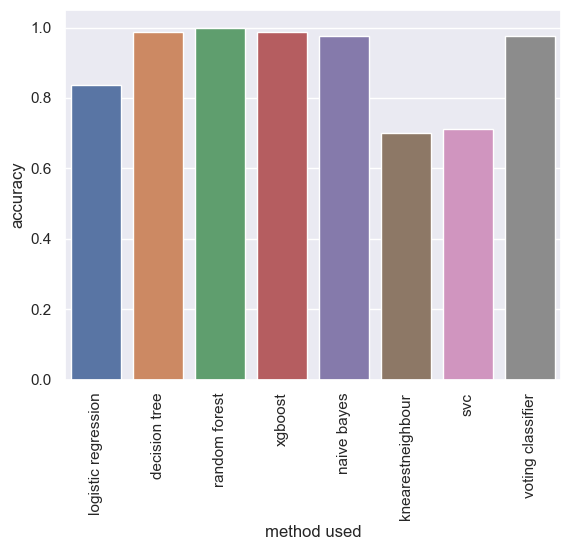

In [86]:
from sklearn.metrics import accuracy_score
list_met = []
list_accuracy=[]
#logistic regression
logit = LogisticRegression()
logit = logit.fit(x_train,y_train)
y_pred_lr = logit.predict(x_test)
accuracy_lr = accuracy_score(y_test,y_pred_lr)
list_met.append("logistic regression")
list_accuracy.append(accuracy_lr)

#decision tree
dtree = DecisionTreeClassifier()
dtree = dtree.fit(x_train,y_train)
y_pred_dt = dtree.predict(x_test)
accuracy_dt = accuracy_score(y_test,y_pred_dt)
list_met.append("decision tree")
list_accuracy.append(accuracy_dt)

#RandomForest
rforest= RandomForestClassifier()
rforest = rforest.fit(x_train,y_train)
y_pred_rf = rforest.predict(x_test)
accuracy_rf = accuracy_score(y_test,y_pred_rf)
list_met.append("random forest")
list_accuracy.append(accuracy_rf)

#xgboost
xgb = XGBClassifier()
xgb = xgb.fit(x_train,y_train)
y_pred_xgb = xgb.predict(x_test)
accuracy_xgb = accuracy_score(y_test,y_pred_xgb)
list_met.append("xgboost")
list_accuracy.append(accuracy_xgb)

#naive bayes
nb = GaussianNB()
nb = nb.fit(x_train,y_train)
y_pred_nb = nb.predict(x_test)
accuracy_nb = accuracy_score(y_test,y_pred_nb)
list_met.append("naive bayes")
list_accuracy.append(accuracy_nb)

#knearestneighbour
knn = KNeighborsClassifier()
knn = knn.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)
accuracy_knn = accuracy_score(y_test,y_pred_knn)
list_met.append("knearestneighbour")
list_accuracy.append(accuracy_knn)

#svc
svc = SVC()
svc = svc.fit(x_train,y_train)
y_pred_svc = svc.predict(x_test)
accuracy_svc = accuracy_score(y_test,y_pred_svc)
list_met.append("svc")
list_accuracy.append(accuracy_svc)

#voting classifier
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier(estimators=[("lr",logit),("dt",dtree),("rf",rforest),("xgb",xgb),("nb",nb),("knn",knn),("svc",svc)],voting="hard")
model_vc = vc.fit(x_train,y_train)
y_pred_vc = model_vc.predict(x_test)
accuracy_vc = accuracy_score(y_test,y_pred_vc)

list3 = [logit,dtree,rforest,xgb,nb,knn,svc,model_vc]
list_met.append("voting classifier")
list_accuracy.append(accuracy_vc)
df_accuracy = pd.DataFrame({"method used":list_met,"accuracy":list_accuracy})
print(df_accuracy)
chart =sns.barplot(x="method used",y= "accuracy",data = df_accuracy)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
plt.show()

In [87]:
#lets chaeck for bias and variance tradeoff
pred_vc_train = model_vc.predict(x_train)
pred_vc_test = model_vc.predict(x_test)
accuracy_vc_train = accuracy_score(y_train, pred_vc_train)
accuracy_vc_test = accuracy_score(y_test, pred_vc_test)

print("************************")
print("Training Accuracy :",accuracy_vc_train)
print("************************")
print("Testb Accuracy :",accuracy_vc_test)


************************
Training Accuracy : 1.0
************************
Testb Accuracy : 0.975


# cross validation

In [88]:
from sklearn.model_selection import cross_val_score
training = cross_val_score(model_vc, x_train, y_train, cv=10)
print("Training Accuracy :", training.mean())
print("***************")
print("Testb Accuracy :",accuracy_vc_test)

Training Accuracy : 0.9875
***************
Testb Accuracy : 0.975


In [89]:
training

array([1.     , 0.9375 , 1.     , 0.96875, 1.     , 1.     , 0.96875,
       1.     , 1.     , 1.     ])

In [90]:
print("************************")
print("Training Accuracy :",classification_report(y_train, pred_vc_train))
print("************************")
print("Testb Accuracy :",classification_report(y_test, pred_vc_test))

************************
Training Accuracy :               precision    recall  f1-score   support

           0       1.00      1.00      1.00       120
           1       1.00      1.00      1.00       200

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320

************************
Testb Accuracy :               precision    recall  f1-score   support

           0       0.97      0.97      0.97        30
           1       0.98      0.98      0.98        50

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.97      0.97      0.97        80



In [91]:
print("************************")
print(confusion_matrix(y_train, pred_vc_train))
print("************************")
print(confusion_matrix(y_test, pred_vc_test))

************************
[[120   0]
 [  0 200]]
************************
[[29  1]
 [ 1 49]]


In [92]:
# Deployment part
# automation part
# hyperameter tuning

In [94]:
df2

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes,classification
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,138.0,4.4,...,1,0,0,1,1,0,0,0,0,1
1,7.0,50.0,1.020,4.0,0.0,121.0,18.0,0.8,138.0,4.4,...,1,0,0,0,0,0,0,0,0,1
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,138.0,4.4,...,1,0,0,0,1,0,1,0,1,1
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,...,0,1,0,1,0,0,1,1,1,1
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,138.0,4.4,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,0.5,150.0,4.9,...,1,0,0,0,0,0,0,0,0,0
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.0,3.5,...,1,0,0,0,0,0,0,0,0,0
397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,0.6,137.0,4.4,...,1,0,0,0,0,0,0,0,0,0
398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,1.0,135.0,4.9,...,1,0,0,0,0,0,0,0,0,0


In [99]:
cleaned_dataset = df2
cleaned_dataset.to_csv("df2")

In [97]:
df2

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes,classification
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,138.0,4.4,...,1,0,0,1,1,0,0,0,0,1
1,7.0,50.0,1.020,4.0,0.0,121.0,18.0,0.8,138.0,4.4,...,1,0,0,0,0,0,0,0,0,1
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,138.0,4.4,...,1,0,0,0,1,0,1,0,1,1
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,...,0,1,0,1,0,0,1,1,1,1
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,138.0,4.4,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,0.5,150.0,4.9,...,1,0,0,0,0,0,0,0,0,0
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.0,3.5,...,1,0,0,0,0,0,0,0,0,0
397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,0.6,137.0,4.4,...,1,0,0,0,0,0,0,0,0,0
398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,1.0,135.0,4.9,...,1,0,0,0,0,0,0,0,0,0


In [100]:
cleaned_dataset.to_csv("cleaned_dataset.csv")